# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [13]:
# Read the XLSX file
data = pd.read_csv("data/bronze.csv",delimiter=";")

## Details
Créée le 24 mars 2018

Modifiée le 9 mai 2023

Description du fichier

Date - Heure: date_heure[datetime]

Date: date[date]

Heure: heure[text]

Code INSEE région: code_insee_region[text]

Région: region[text]

Consommation brute gaz (MW PCS 0°C) - GRTgaz: consommation_brute_gaz_grtgaz[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre GRTgaz

Statut - GRTgaz: statut_grtgaz[text]

Consommation brute gaz (MW PCS 0°C) - Teréga: consommation_brute_gaz_terega[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre Teréga

Statut - Teréga: statut_terega[text]

Consommation brute gaz totale (MW PCS 0°C): consommation_brute_gaz_totale[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C

Consommation brute électricité (MW) - RTE: consommation_brute_electricite_rte[int] Consommation brute régionale d’électricité au pas 30 minutes en MW

Statut - RTE: statut_rte[text]


Consommation brute totale (MW): consommation_brute_totale[int] Consommation brute régionale totale au pas horaire en MW

In [14]:
data.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB


In [16]:
data.shape

(2207796, 13)

In [18]:
import time

print(f"Déja {time.time()} secondes de passées depuis le 1er janvier 1970")

Déja 1694422865.9351199 secondes de passées depuis le 1er janvier 1970


## <font color="green"> || - Missing Data </font>

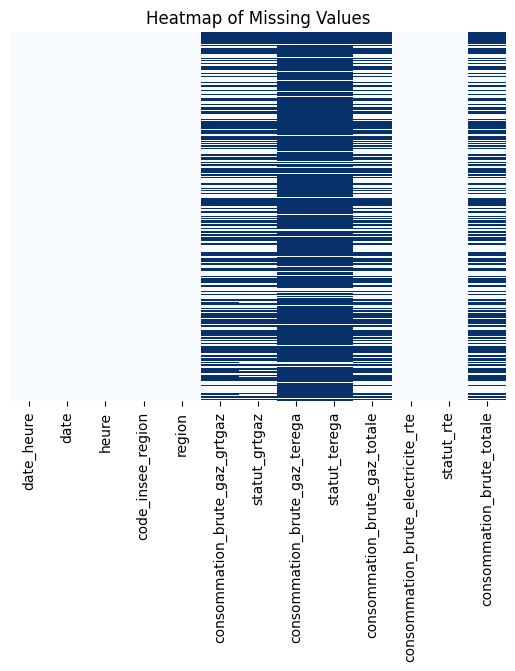

In [19]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [20]:
data.isnull().sum()

date_heure                                  0
date                                        0
heure                                       0
code_insee_region                           0
region                                      0
consommation_brute_gaz_grtgaz         1121532
statut_grtgaz                         1103964
consommation_brute_gaz_terega         1931823
statut_terega                         1931822
consommation_brute_gaz_totale         1121533
consommation_brute_electricite_rte          0
statut_rte                                  0
consommation_brute_totale             1121533
dtype: int64

In [21]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['acteurs'].isnull()]
lignes_nan.head()

KeyError: 'acteurs'